## SuperDataScience Podcast NLP Analysis

### Notebook# 2: SDS Episodes Web Scraping

<div style="width: 500px;">
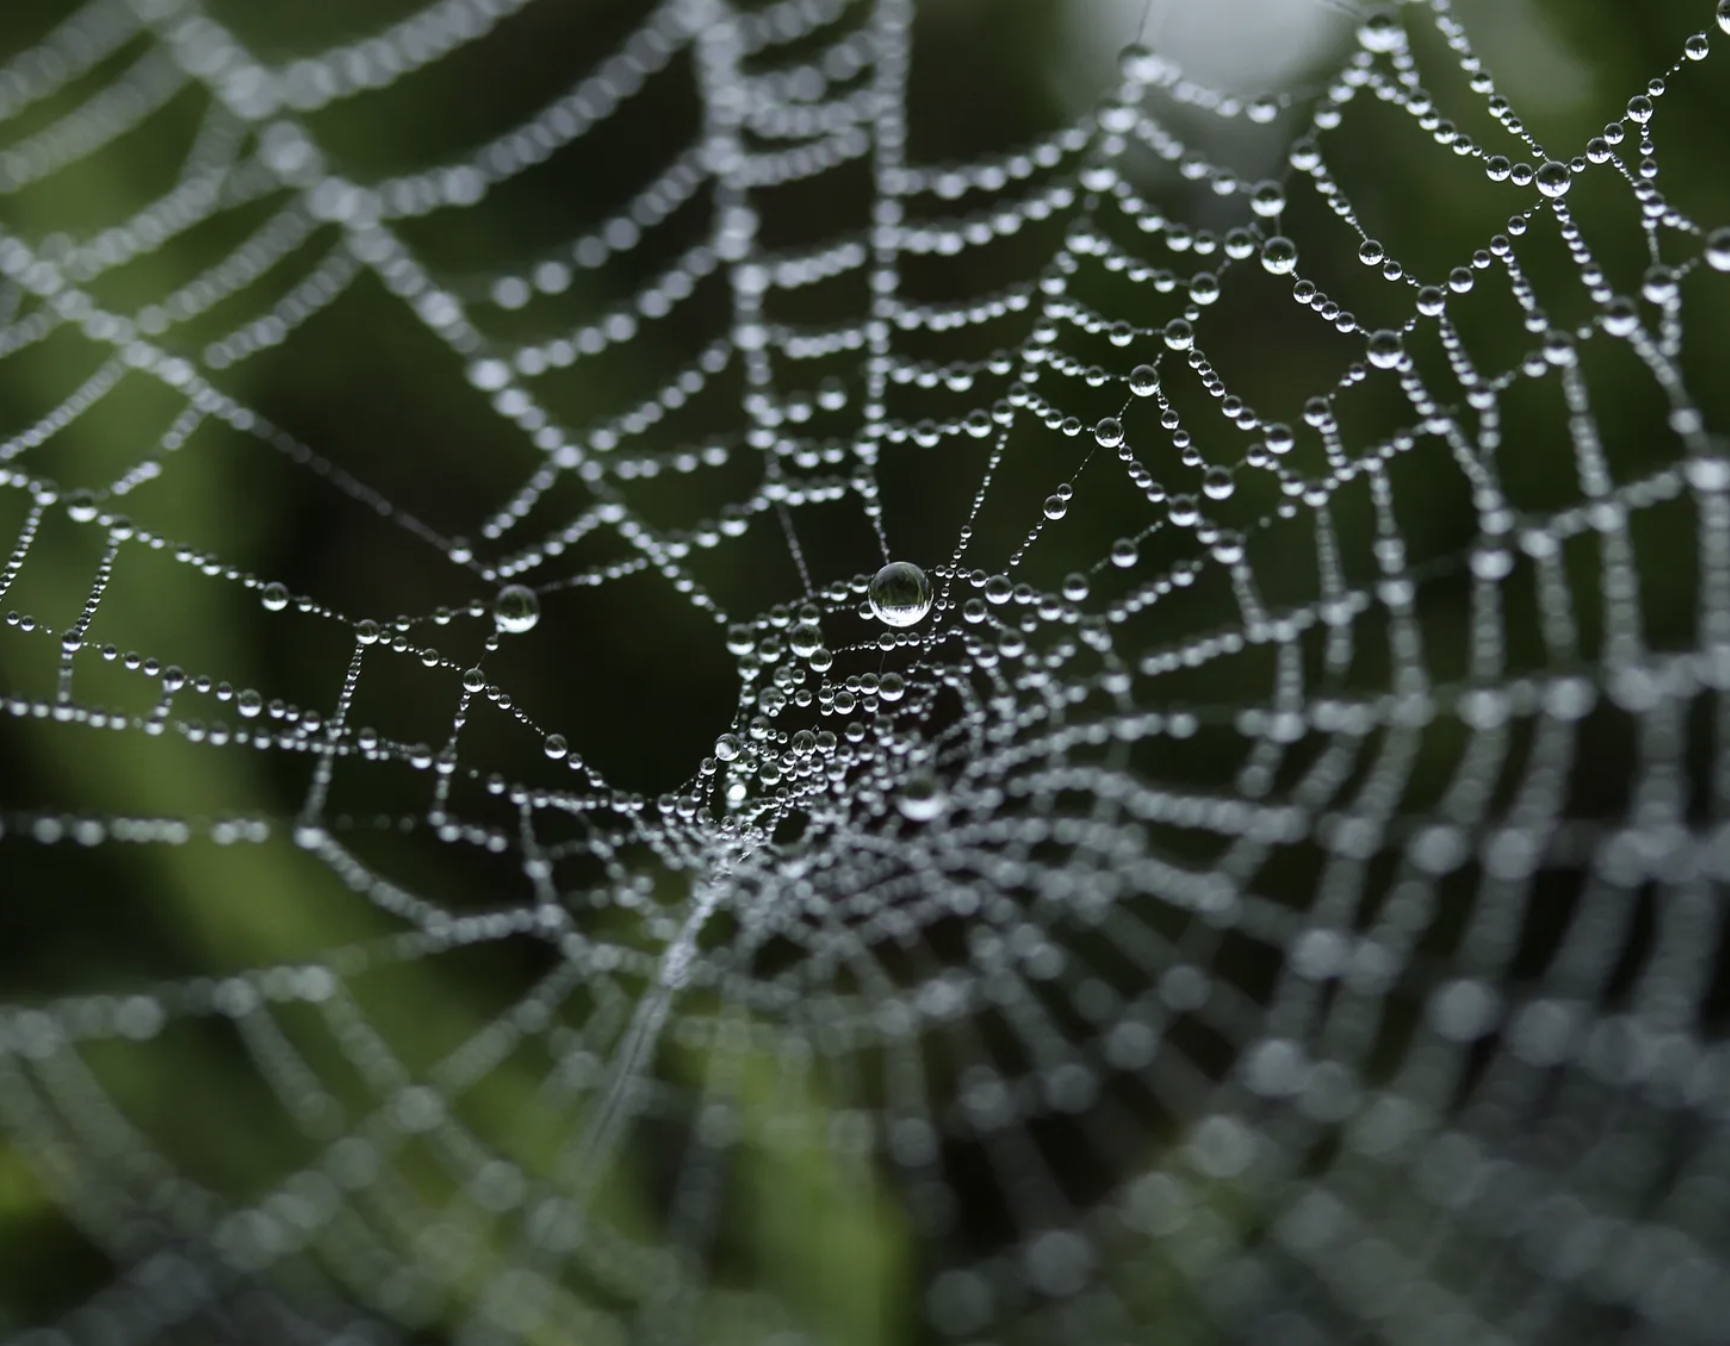

This notebook contains code for Web Scraping transcripts and other relevant information for SuperDataScience podcast episodes 1 to 682. Selenium library was used to dynamically load the web pages and BeautifulSoup to pull the data.

In [1]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import re
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
import warnings
import time

In [2]:
warnings.filterwarnings("ignore", category = FutureWarning)

In [3]:
# importing the list of URL created using code in Notebook #1: Web_Socket_URL 
sds_url_links = pd.read_csv('../data/sds_url_links.csv')

In [4]:
sds_url_links.head(2)

,url_link
0,https://www.superdatascience.com/podcast/how-t...
1,https://www.superdatascience.com/podcast/sds-0...


In [ ]:
# Creating empty dataframe with different columns to store the scraped text

superdatascience = pd.DataFrame(columns = ['episode_name',
                              'length_episode',
                              'context_episode',
                              'guest_name',
                              'guest_info',
                              'text_episode'])

# Function to scrape different elements of the web page and store in dataframe 
def SDS_Scraper(url_links):
    
    driver = webdriver.Chrome()

    global superdatascience

    #List of variables
    episode = ""
    length = ""
    context = ""
    guest = ""
    info = ""
    text = ""

    for url in url_links:
        driver.get(url)
        time.sleep(10)
    
        html_content = driver.page_source
        soup = BS(html_content, 'html.parser')
    
        topic_element = soup.find('h2')
        episode = topic_element.text.strip()
    
        p_element = soup.find('p', class_='read-time')
        length = p_element.text.strip()
     
        tag_element = soup.find('p', class_='tags')
        context = tag_element.text.strip()
    
        guest_element = soup.find('div', class_='information')
        guest = guest_element.text.strip()
        
        guest_info_element = soup.find('div', {'class': 'block-animation'})
        info = guest_info_element.text.strip()
      
        text_element = soup.find('div', {'class': 'content block-animation'})
        if text_element is not None:
            text = text_element.text.strip()
        else: 
            text = None
    
        superdatascience = superdatascience.append({'episode_name': episode, 
                                                'length_episode': length, 
                                                'context_episode' : context, 
                                                'guest_name': guest,
                                                 'guest_info': info,  
                                                'text_episode': text}, ignore_index = True) 
        time.sleep(3)
       
    driver.close()
    

Scraping was done in batches of 100 url at one time. Took around 5 hours to scrap transcripts for 682 episodes. 

In [ ]:
# Funtion to scrape pages
SDS_Scraper(sds_url_links['url_link'])

In [ ]:
superdatascience

In [ ]:
superdatascience = superdatascience.drop_duplicates()

In [ ]:
superdatascience.reset_index(drop = True)

In [ ]:
superdatascience.to_csv('../data/SDS_1_678.csv', index = False) 